In [1]:
import os
import pandas as pd

REPO_DIR = os.path.dirname(os.path.abspath(''))
DATA_DIR = os.path.join(REPO_DIR, "data/")

#FILE_PATH = os.path.join(DATA_DIR, "articles/bitcoin.csv")
FILE_PATH = os.path.join(DATA_DIR, "articles/back.txt")
HISTORY_PATH = os.path.join(DATA_DIR, "articles/history.csv")

# Read dataset

In [2]:
#df = pd.read_csv(r'C:\Users\HP 1030 G2\Desktop\Cours DIT\El Hadj\oil-stocks-prediction\data\articles\back.txt',sep='|',encoding='latin-1',error_bad_lines=False)
df = pd.read_csv(FILE_PATH, sep='|', encoding='utf-8', error_bad_lines=False)
df

b'Skipping line 387: expected 5 fields, saw 6\nSkipping line 4827: expected 5 fields, saw 6\n'


,Source_date,hash,news,journal,date
0,"09/30/2021, 20:54:18",fc7a05bddeb9dc122b2cc81d4a3681f5,"Buy Solana (SOL) Now, or Wait for a Dip on Alt...",By InsideBitcoins,2021-09-30
1,"09/30/2021, 20:54:18",4071dc6d77f81e7e76294d69a0bd0b12,Bitcoin (BTC) Price Prediction: BTC/USD Faces ...,By InsideBitcoins,2021-09-30
2,"09/30/2021, 20:54:18",f584141957ed385e1343c6ab08ba6f2e,ADAX Pro AMA Takeaway. Launching As Soon As Q4,By DailyCoin,2021-09-30
3,"09/30/2021, 20:54:18",5c2bf946cf892db1cc258681e7372126,Bitcoin Forecast For 2022 From Financial Insti...,By DailyCoin,2021-09-30
4,"09/30/2021, 20:54:18",302914b28fdfa98c83e9c190e0156b23,Crypto: Decentralized finance protocol Compoun...,By MarketWatch,2021-09-30
...,...,...,...,...,...
5531,"09/30/2021, 21:32:47",bbf292eaa0a4b086c786287e601664cc,"Hut 8 Buys 11,090 New Bitcoin Mining Rigs For ...",By Bitcoin Magazine,2021-07-01
5532,"09/30/2021, 21:32:47",1a63542f6c6ab53ccb97c67653df92ef,Think Bitcoin is Due for a Rally? Consider The...,By StockNews,2021-07-01
5533,"09/30/2021, 21:32:47",23c632e95220a6bc3f09b584f150a488,Mexico Rebukes Pliego’s Calls for BTC Transact...,By Live Bitcoin News,2021-07-01
5534,"09/30/2021, 21:32:47",1a63542f6c6ab53ccb97c67653df92ef,Think Bitcoin is Due for a Rally? Consider The...,By StockNews,2021-07-01


In [3]:
# drop unuseful variables

def permute_date(s):
    year, month, day = s.split("/")
    return "/".join([day, month, year])

df = df.drop(['Source_date','hash','journal'], axis=1)
df.date = df.date.apply(lambda s: s.replace("-", "/"))
df.date = df.date.apply(lambda s: permute_date(s))

df

,news,date
0,"Buy Solana (SOL) Now, or Wait for a Dip on Alt...",30/09/2021
1,Bitcoin (BTC) Price Prediction: BTC/USD Faces ...,30/09/2021
2,ADAX Pro AMA Takeaway. Launching As Soon As Q4,30/09/2021
3,Bitcoin Forecast For 2022 From Financial Insti...,30/09/2021
4,Crypto: Decentralized finance protocol Compoun...,30/09/2021
...,...,...
5531,"Hut 8 Buys 11,090 New Bitcoin Mining Rigs For ...",01/07/2021
5532,Think Bitcoin is Due for a Rally? Consider The...,01/07/2021
5533,Mexico Rebukes Pliego’s Calls for BTC Transact...,01/07/2021
5534,Think Bitcoin is Due for a Rally? Consider The...,01/07/2021


In [4]:
# aggregate per date
df['daily_news'] = df.groupby(['date'])['news'].transform(lambda x : ' '.join(x))
df = df.drop('news', axis=1)
df = df.drop_duplicates()
df = df.set_index("date")

#df = df.reset_index()
df

,daily_news
date,
30/09/2021,"Buy Solana (SOL) Now, or Wait for a Dip on Alt..."
29/09/2021,"A flippant Elon Musk takes shots at Biden, the..."
28/09/2021,El Salvador President Shares Images of What Se...
27/09/2021,"TA: Bitcoin Stuck In Range, What Could Spark K..."
26/09/2021,"TA: Bitcoin Forms Bullish Pattern, Why BTC Cou..."
...,...
05/07/2021,"TA: Bitcoin Prints Bearish Technical Pattern, ..."
04/07/2021,"TA: Bitcoin Correcting Gains, What Could Trigg..."
03/07/2021,JPMorgan Predicts When Bitcoin Bear Market Wil...


# Load historical file

In [5]:
history = pd.read_csv(HISTORY_PATH)
history

,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Vol.,Variation %
0,30/09/2021,"43.823,3","41.534,5","44.101,2","41.416,7","64,32K","5,50%"
1,29/09/2021,"41.536,8","41.023,1","42.571,2","40.815,0","48,21K","1,25%"
2,28/09/2021,"41.022,3","42.169,9","42.758,8","40.906,4","60,01K","-2,73%"
3,27/09/2021,"42.172,6","43.200,9","44.293,2","42.143,9","54,12K","-2,39%"
4,26/09/2021,"43.203,4","42.685,8","43.907,3","40.786,6","69,91K","1,21%"
...,...,...,...,...,...,...,...
87,05/07/2021,"33.687,8","35.297,0","35.300,5","33.164,1","88,36K","-4,56%"
88,04/07/2021,"35.298,2","34.742,8","35.957,6","34.740,1","56,13K","1,60%"
89,03/07/2021,"34.742,8","33.814,2","34.909,8","33.363,3","55,69K","2,75%"
90,02/07/2021,"33.813,4","33.542,2","33.925,9","32.734,6","78,93K","0,80%"


In [6]:
def labelize(s):
   if s >= 0:
      return "positive"
   return "negative"
   
cols = ["Dernier", "Ouv."]
for col in cols:
   history[col] = history[col].apply(lambda s: s.split(',')[0])
history[cols] = history[cols].astype("float")
cols = cols + ["Date"]
history = history[cols]
history["label"] = history["Dernier"] - history["Ouv."]
history = history[["Date", "label"]]
history.label = history.label.apply(lambda s: labelize(s))
history = history.set_index('Date')
history

<ipython-input-6-a579ee639d11>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  history["label"] = history["Dernier"] - history["Ouv."]


,label
Date,
30/09/2021,positive
29/09/2021,positive
28/09/2021,negative
27/09/2021,negative
26/09/2021,positive
...,...
05/07/2021,negative
04/07/2021,positive
03/07/2021,positive


# merge the dataset

In [7]:
label_df = pd.concat([df, history], axis=1, join="inner")
# we dont need the date column, then we remove them
label_df = label_df.reset_index().drop('index', axis=1)
label_df

,daily_news,label
0,"Buy Solana (SOL) Now, or Wait for a Dip on Alt...",positive
1,"A flippant Elon Musk takes shots at Biden, the...",positive
2,El Salvador President Shares Images of What Se...,negative
3,"TA: Bitcoin Stuck In Range, What Could Spark K...",negative
4,"TA: Bitcoin Forms Bullish Pattern, Why BTC Cou...",positive
...,...,...
86,"TA: Bitcoin Prints Bearish Technical Pattern, ...",negative
87,"TA: Bitcoin Correcting Gains, What Could Trigg...",positive
88,JPMorgan Predicts When Bitcoin Bear Market Wil...,positive
89,Bitcoin Blocks Will Soon Be 27% Easier to Find...,positive


C:\Users\HP 1030 G2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

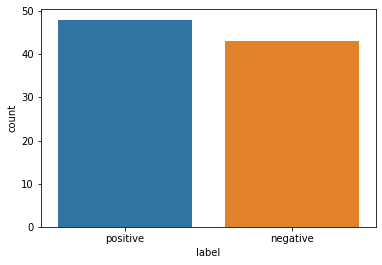

In [8]:
import seaborn as sns
sns.countplot(label_df.label)

#### we dont face a imbalanced dataset case, so we can run our model

# Always start with a simple model

In [9]:
features = label_df.daily_news
labels = label_df.label
print(features.shape)
print(labels.shape)

(91,)
(91,)


In [10]:
features

0     Buy Solana (SOL) Now, or Wait for a Dip on Alt...
1     A flippant Elon Musk takes shots at Biden, the...
2     El Salvador President Shares Images of What Se...
3     TA: Bitcoin Stuck In Range, What Could Spark K...
4     TA: Bitcoin Forms Bullish Pattern, Why BTC Cou...
                            ...                        
86    TA: Bitcoin Prints Bearish Technical Pattern, ...
87    TA: Bitcoin Correcting Gains, What Could Trigg...
88    JPMorgan Predicts When Bitcoin Bear Market Wil...
89    Bitcoin Blocks Will Soon Be 27% Easier to Find...
90    Use Of Green Energy For Bitcoin Mining Increas...
Name: daily_news, Length: 91, dtype: object

## process text

In [11]:
import re
def process_text(text):
    # removed all the special characters 
    processed_feature = re.sub(r'\W', ' ', str(text))

    # remove all single characters 
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # remove single characters from start 
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # substuting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags = re.I)

    # removing prefixed b
    processed_feature = re.sub(r'^b\s+', ' ', processed_feature) 

    processed_feature = processed_feature.lower()
    return processed_feature
 
    



In [12]:
features = [process_text(s) for s in features.values]

In [13]:
features

['buy solana sol now or wait for dip on altcoins bitcoin btc price prediction btc usd faces rejection at 44k high as bitcoin consolidates above 42k adax pro ama takeaway launching as soon as q4 bitcoin forecast for 2022 from financial institutions and experts crypto decentralized finance protocol compound plunges 10 after overpaying millions of liquidity mining rewards bitcoin ether rise china ban on crypto assets forces huobi mining pool to rotate 100k bitcoin crypto flipsider news europe as biggest crypto economy dydx drop comp rewards overpay twitter nft preview iran illegal crypto mining china new plans bitcoin and ether market update september 30 2021 president bukele reduces gas price for chivo bitcoin wallet users in el salvador billionaire orlando bravo is very bullish bitcoin hodler powers on don worry bitcoin adoption will not be stopped bitcoin stalls as s china go after cryptocurrencies some bitcoin miners are going nuclear this map shows the best s states to mine for bitco

## remove stopwords

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer(max_features = 2500, min_df = 7, max_df = 0.8, stop_words = stopwords.words('english'))
p_features = vectorizer.fit_transform(features).toarray()

[nltk_data] Downloading package stopwords to C:\Users\HP 1030
[nltk_data]     G2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
p_features.shape

(91, 1126)

#### our features have too lot of dimension, lets reduce them with a PCA model

## Principal component analysis to reduce dimension

In [16]:
from sklearn.decomposition import PCA

row, dimension = p_features.shape
pca = PCA(n_components=row)
pca.fit(p_features)
pca.explained_variance_ratio_.cumsum()

array([0.03895186, 0.0710323 , 0.09960691, 0.12694399, 0.15150002,
       0.17459277, 0.19716358, 0.21851041, 0.23845559, 0.25783582,
       0.27662879, 0.29518896, 0.31317347, 0.33058684, 0.34721125,
       0.36360671, 0.37957704, 0.39527932, 0.41044995, 0.42548506,
       0.44019812, 0.45465943, 0.46895342, 0.48284605, 0.49644303,
       0.5098092 , 0.52279953, 0.53548531, 0.54780979, 0.5598991 ,
       0.57173298, 0.58345989, 0.59506357, 0.60638413, 0.61741057,
       0.62808798, 0.6386558 , 0.64878611, 0.65887453, 0.66894156,
       0.67882943, 0.68862017, 0.69829797, 0.7078568 , 0.71724918,
       0.72625204, 0.73513244, 0.74391007, 0.7525715 , 0.76106086,
       0.76942582, 0.77772444, 0.78581383, 0.79379552, 0.801751  ,
       0.80935169, 0.81683027, 0.82424985, 0.8316064 , 0.83886775,
       0.84606523, 0.85322348, 0.86013603, 0.86686148, 0.8735629 ,
       0.88011499, 0.88648854, 0.89280649, 0.89892974, 0.90494858,
       0.91082601, 0.91660827, 0.92236166, 0.92796141, 0.93341

Text(0.5, 1.0, 'PCA for sentiment analysis')

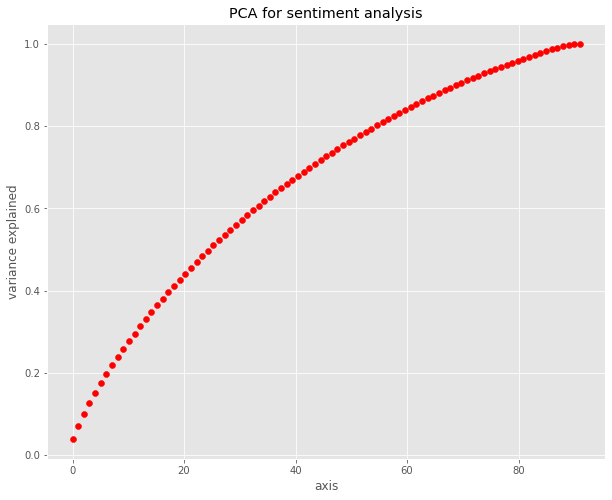

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize = (10, 8))
plt.style.use("ggplot")
plt.scatter(np.linspace(0, 91, 91), pca.explained_variance_ratio_.cumsum(), color = "red", marker = 'o' )
plt.xlabel("axis")
plt.ylabel("variance explained")
plt.title("PCA for sentiment analysis")

In [18]:
p_features_pca = pca.transform(p_features)

In [19]:
p_features_pca.shape

(91, 91)

In [20]:
p_features_pca_reduce = p_features_pca[:, 0:40]


In [21]:
p_features_pca_reduce.shape

(91, 40)

## split into tran & test & validation

In [22]:
# train validation test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(p_features_pca_reduce, labels, test_size = 0.25, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 3)


# print train test validation set 
print("training features size: {}, training label size: {}".format(X_train.shape, y_train.shape))

# display training validation size 
print("Validation set features size: {}, validation set label size: {}".format(X_val.shape, y_val.shape))

# display test features and labels 
print("test feature size: {}, test label size: {}".format(X_test.shape , y_test.shape))

training features size: (51, 40), training label size: (51,)
Validation set features size: (17, 40), validation set label size: (17,)
test feature size: (23, 40), test label size: (23,)


## logistic naive model (without cross validation)

In [30]:

import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression

def accuracy(true_value, predicted_value):
  # define accuracy metric 
  return ((true_value == predicted_value).sum()/ len(true_value)) * 100

clf = LogisticRegression()
clf.fit(X_train, y_train)


# prediction on validation test
y_pred_val = clf.predict(X_val)
val_error = accuracy(y_pred_val, y_val)


# prediction on test set
y_pred_test = clf.predict(X_test)
test_error = accuracy(y_pred_test, y_test)

print("validation error:", val_error)
print("test error", test_error)

validation error: 41.17647058823529
test error 47.82608695652174


## Let's grid search

In [24]:
# gridsearch for logistic regression
from sklearn.model_selection import GridSearchCV
parameters = {
    "penalty": ["l1", "l2"]
}
alg_ = LogisticRegression(
    multi_class="multinomial",
    solver ="saga")
clf = GridSearchCV(alg_, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='multinomial',
                                          solver='saga'),
             param_grid={'penalty': ['l1', 'l2']})

In [25]:
pd.DataFrame.from_dict(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003075,0.001578,0.000650,0.000539,l1,{'penalty': 'l1'},0.545455,0.5,0.5,0.6,0.6,0.549091,0.044758,2
1,0.004931,0.001208,0.000859,0.000635,l2,{'penalty': 'l2'},0.545455,0.6,0.5,0.7,0.6,0.589091,0.066903,1


In [26]:
clf.best_params_

{'penalty': 'l2'}

# SVM

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline


#pipe = make_pipeline(StandardScaler(), SVC(gamma='auto'))
pipe = Pipeline([('linear', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
Pipeline(steps=[('linear', StandardScaler()), ('svc', SVC())])

# prediction on validation test
y_pred_val = pipe.predict(X_val)
val_error = accuracy(y_pred_val, y_val)


# prediction on test set
y_pred_test = pipe.predict(X_test)
test_error = accuracy(y_pred_test, y_test)

print("validation error:", val_error)
print("test error", test_error)


#pipe.score(X_test, y_test)

validation error: 52.94117647058824
test error 56.52173913043478


In [48]:
X_val.shape

(17, 40)

# KNN

In [61]:
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsRegressor
#model=KNeighborsRegressor()
accuracies=[] # définit une variable qui garde les différents scores du modèle
accuracies_test=[]
p = random.randint(1, 10)
#for k in range(20,50): # on fait une optimisation de l'hyperparamètre en choisissant un ensemble de valeurs de k
model = KNeighborsRegressor() # on instancie un modèle knn avec le k
model.fit(X_train, y_train) # on entraine le modèle sur le jeu d'entrainement
    # prediction on validation test
y_pred_val = model.predict(X_val)
#val_error = accuracy(y_pred_val, y_val)

print(f"score = {val_error} pour k={k}, p={p}") 
#    print(f"score = {test_error} pour k={k}, p={p}")
 #   accuracies+= [val_error] # on garde le score dans notre conteneur
  #  accuracies_test+= [test_error]
#plt.plot(accuracies)
#plt.plot(accuracies_test)
#plt.show()
#import numpy as np
#print(f"le pique se trouve a {range(20,50)[np.argmax(accuracies)]} et est de {max(accuracies)}")

TypeError: unsupported operand type(s) for /: 'str' and 'int'